In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Below Loading the data with read_csv
diabetes_data = pd.read_csv("/content/diabetes.csv")

# Set seed for reproducibility
np.random.seed(42)

# Take a random sample data of 25 observations from loaded csv file "diabetes.csv"
sample = diabetes_data.sample(n=25)

# Calculate mean and highest glucose values for random sample data and population of people
sample_mean_glucose = round(sample['Glucose'].mean(),2)
#Printing the Mean values of random Sample data
print("Mean of Glucose Value for Sample: ",sample_mean_glucose)

sample_highest_glucose = sample['Glucose'].max()
#Printing the Maximum value of random Sample data
print("Highest of Glucose Value for Sample: ",sample_highest_glucose)

population_mean_glucose = round(diabetes_data['Glucose'].mean(),2)
#Printing the Mean values of loaded csv data
print("Mean of Glucose Value for Population: ",population_mean_glucose)

population_highest_glucose = diabetes_data['Glucose'].max()
#Printing the Maximum value of loaded csv data
print("Highest of Glucose Value for Population: ",population_highest_glucose)

Mean of Glucose Value for Sample:  116.64
Highest of Glucose Value for Sample:  183
Mean of Glucose Value for Population:  120.89
Highest of Glucose Value for Population:  199


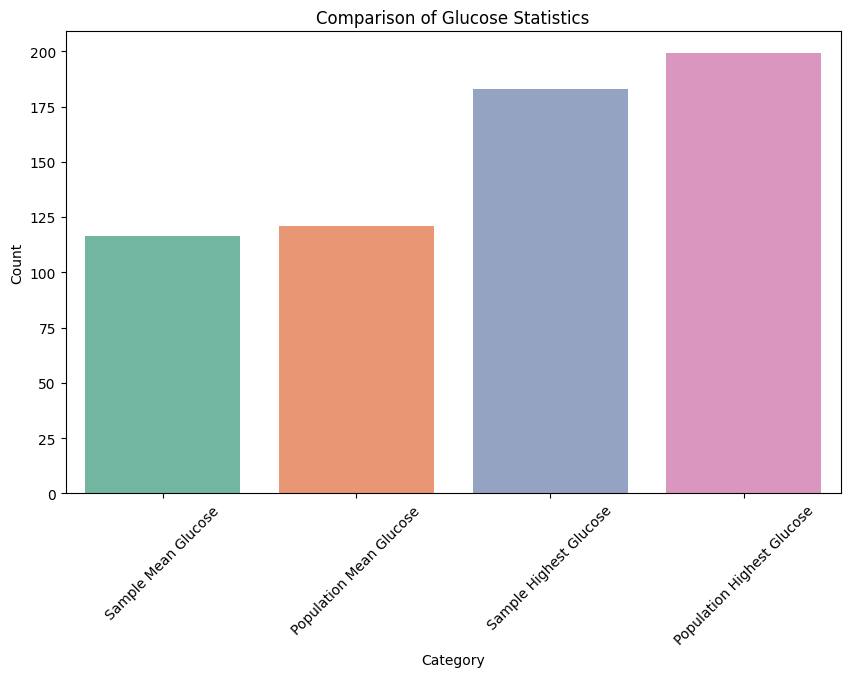

In [ ]:
#Compare the statistics using barplot
categories = ['Sample Mean Glucose', 'Population Mean Glucose', 'Sample Highest Glucose', 'Population Highest Glucose']
counts = [sample_mean_glucose, population_mean_glucose, sample_highest_glucose, population_highest_glucose]  # Replace with actual values

# Create a DataFrame
df = pd.DataFrame({'Category': categories, 'Count': counts})

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df, hue=df['Category'], palette='Set2', legend=False)
plt.title('Comparison of Glucose Statistics')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Find the 98th percentile of BMI for random sample data
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
print("Sample 98th percentile BMI:",round(sample_98th_percentile_bmi,2))
# Find the 98th percentile of BMI for loaded csv data
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)
print("Population 98th percentile BMI:",round(population_98th_percentile_bmi,2))

Sample 98th percentile BMI: 40.25
Population 98th percentile BMI: 47.53


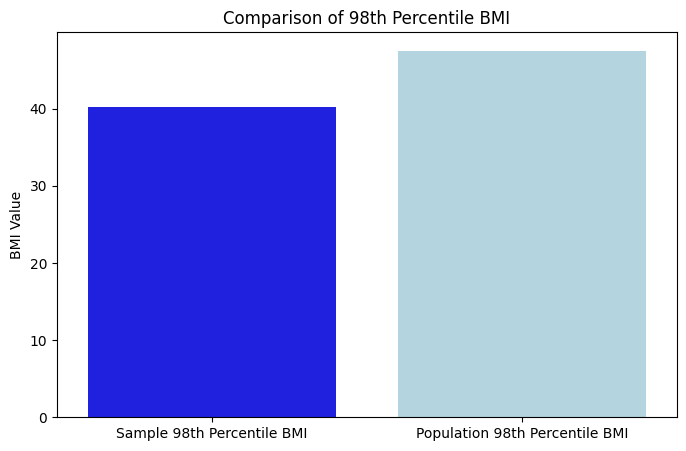

In [ ]:
# Assuming the data is provided
plt.figure(figsize=(8, 5))
sns.barplot(x=['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
            y=[sample_98th_percentile_bmi, population_98th_percentile_bmi],  # Replace with actual values
            hue=['Sample', 'Population'],
            legend=False,
            palette=['#0000FF', '#ADD8E6'],  # Blue and Light Blue
            dodge=False)
plt.title('Comparison of 98th Percentile BMI')
plt.ylabel('BMI Value')
plt.show()

In [ ]:
# Function to calculate statistics from bootstrap samples

def bootstrap_statistics(data, n_bootstrap_samples=500, sample_size=150):
    bs_means = []
    bs_stds = []
    bs_percentiles = []

    for _ in range(n_bootstrap_samples):
        bootstrap_sample = data.sample(n=sample_size, replace=True)
        bs_means.append(np.mean(bootstrap_sample['BloodPressure']))
        bs_stds.append(np.std(bootstrap_sample['BloodPressure']))
        bs_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 50))  # Using median instead of percentile

    return bs_means, bs_stds, bs_percentiles

# Calculate bootstrap statistics
bs_means, bs_stds, bs_percentiles = bootstrap_statistics(diabetes_data)

# Calculate population statistics
#finding Mean for loaded csv data
population_mean_blood_pressure = np.mean(diabetes_data['BloodPressure'])
print("Population Mean BP:", round(population_mean_blood_pressure, 2))
#finding standard deviation for loaded csv data
population_std_blood_pressure = np.std(diabetes_data['BloodPressure'])
print("Population Standard BP:", round(population_std_blood_pressure, 2))
#finding percentile for loaded csv data
population_percentile_blood_pressure = np.percentile(diabetes_data['BloodPressure'], 50)
print("Population Percentile BP:", round(population_percentile_blood_pressure, 2))

Population Mean BP: 69.11
Population Standard BP: 19.34
Population Percentile BP: 72.0


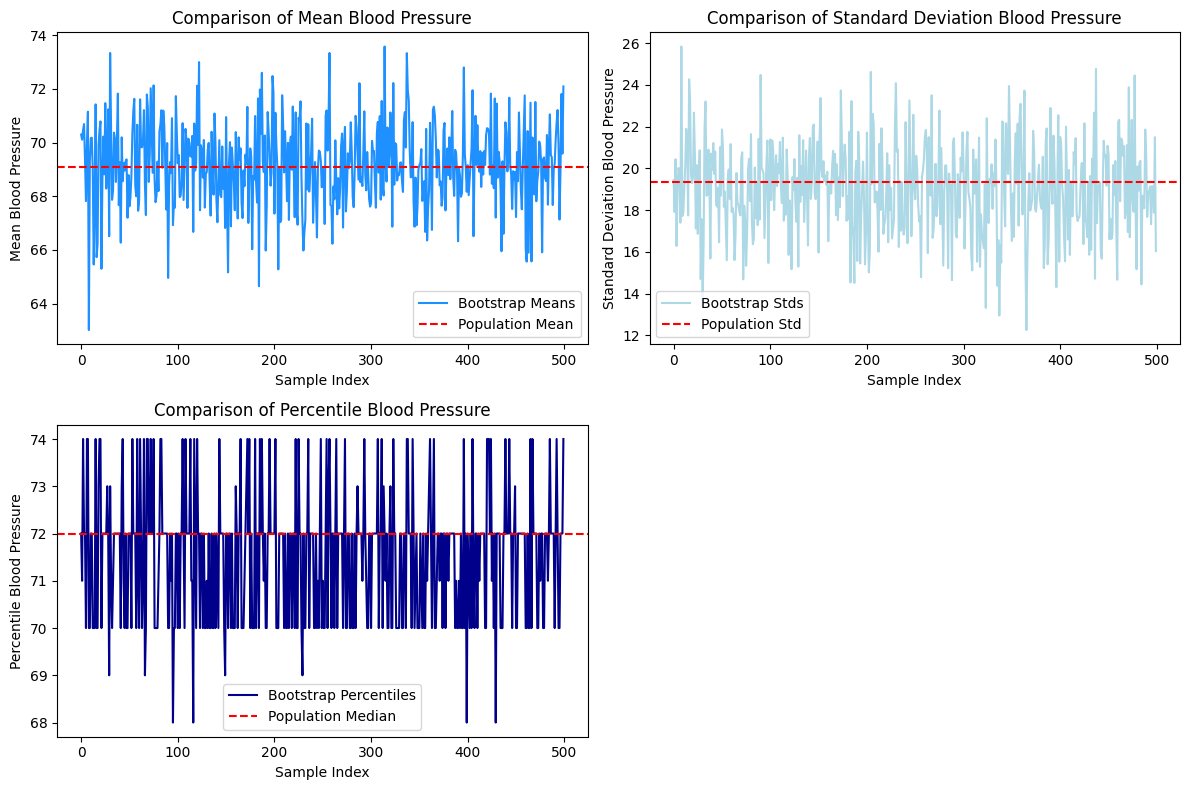

In [ ]:
plt.figure(figsize=(12, 8))

# Plot mean comparison
plt.subplot(2, 2, 1)
sns.lineplot(x=range(len(bs_means)), y=bs_means, color='#1E90FF', label='Bootstrap Means')  # Blue
plt.axhline(population_mean_blood_pressure, color='#FF0000', linestyle='--', label='Population Mean')  # Red
plt.title('Comparison of Mean Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Mean Blood Pressure')
plt.legend()

# Plot standard deviation comparison
plt.subplot(2, 2, 2)
sns.lineplot(x=range(len(bs_stds)), y=bs_stds, color='#ADD8E6', label='Bootstrap Stds')  # Light Blue
plt.axhline(population_std_blood_pressure, color='#FF0000', linestyle='--', label='Population Std')  # Red
plt.title('Comparison of Standard Deviation Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Standard Deviation Blood Pressure')
plt.legend()

# Plot percentile comparison
plt.subplot(2, 2, 3)
sns.lineplot(x=range(len(bs_percentiles)), y=bs_percentiles, color='#00008B', label='Bootstrap Percentiles')  # Dark Blue
plt.axhline(population_percentile_blood_pressure, color='#FF0000', linestyle='--', label='Population Median')  # Red
plt.title('Comparison of Percentile Blood Pressure')
plt.xlabel('Sample Index')
plt.ylabel('Percentile Blood Pressure')
plt.legend()

plt.tight_layout()
plt.show()

**Findings:**

**Glucose Analysis:**  
The sample's highest glucose level is below that of the population, and its average glucose value is slightly lower. This indicates that the sample may have fewer instances of extremely high glucose levels and a modestly lower mean glucose level compared to the population.

**BMI Analysis:**  
The sample's BMI, at the 98th percentile, is notably lower than the population's. This suggests that the sample includes fewer individuals with exceptionally high BMI values relative to the population.

**Blood Pressure (BP) Analysis:**  
Due to the bootstrapping method, the mean and standard deviation of blood pressure in the samples should closely align with the population's values. Similarly, the median blood pressure (50th percentile) of the bootstrap samples is expected to be near the population mean.

**Conclusion:**  
While BMI percentiles show significant differences, the sample's glucose and blood pressure trends generally mirror those of the population. Any observed differences may stem from random variation in the sample or potential differences between the sample and the broader population.


